# Looping Over Collections - Lab

## Introduction
In this lab, we will be practicing what we know about for loops. We will use them to reduce the amount of code we write by hand to iterate through collections. We will use data from our excel file, `cities.xlsx`, that had data on different cities, their populations, and their areas. Finally, we will use this information to plot and compare each city. Let's get started!

## Objectives
You will be able to:
* Use loops to iterate over a collection of records

## Identifying When To Use a For Loop

In the last lesson, we worked with some of our travel data.  Let's retrieve a list with our travel information again from excel.  First, we read the information from excel as a list of dictionaries, with each dictionary representing a location.  And we assign this list to the variable `cities`.

In [2]:
# If you're viewing this lab on learn, uncomment the next line to install xlrd on the docker container
!pip install xlrd 
import pandas
file_name = './cities.xlsx'
travel_df = pandas.read_excel(file_name)
cities = travel_df.to_dict('records')

smart-open 1.8.0 requires bz2file, which is not installed.
nltk 3.4 requires singledispatch, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Next, we retrieve the first three city names, stored as the `'City'` attribute of each dictionary, and `'Population'` of each of the cities.  Then we plot the names as our `x_values` and the populations as our `y_values`.

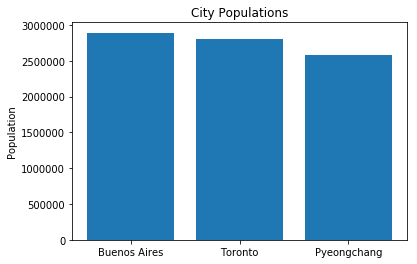

In [69]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

%matplotlib inline

x_values = [cities[0]['City'], cities[1]['City'], cities[2]['City']]
y_values = [cities[0]['Population'], cities[1]['Population'], cities[2]['Population']]
 
plt.bar(x_values, y_values)
plt.ylabel('Population')
plt.title('City Populations')
 
plt.show()

Of course, as you may have spotted, there is a good amount of repetition in displaying this data.  Just take a look at how we retrieved the data for our `x_values` and `y_values`. And you'll notice that, unless we know the exact number of cities and populations in our excel file, this method of retrieving data might miss some data or try to access values that don't exist. 

We can take a close look at this below:

In [4]:
x_values = [cities[0]['City'], cities[1]['City'], cities[2]['City']]
y_values = [cities[0]['Population'], cities[1]['Population'], cities[2]['Population']]

As we can see, if we have any more than 3 lines of data, our `x_values` and `y_values` will be incomplete, and if we had only 2 lines of data, our code would break.

So in this lesson, we will use our `for` loop to display information about our travel locations with less repetition and more accuracy.

## Instructions

Before we get into creating graphs from our cities data, let's get a bit more comfortable with the data we are working with. Let's see if we can iterate through just one element (i.e. a city **dictionary** object) to get the **area**. 

In [5]:
buenos_aires = cities[0]
buenos_aires

{'City': 'Buenos Aires',
 'Country': 'Argentina',
 'Population': 2891000,
 'Area': 4758}

In [6]:
# here we want to find just the area of buenos_aires
buenos_aires_area = buenos_aires['Area']
# code goes here

buenos_aires_area

4758

Now that we have a bit more familiarity with our dictionaries, we can move on to gathering all the information we need to create our traces. 

Our `cities` list contains information about the top 12 cities.  For our upcoming iteration tasks, it will be useful to have a list of the numbers 0 through 11.  Use what we know about `len` and `range`to generate a list of numbers 1 through 11.  Assign this to a variable called `city_indices`.

In [8]:
city_indices = list(range(12))
city_indices # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Now, using the `cities` list, we want to create a list of the names for each city. Loop through each city and append it's name (`'City'`) to the `city_names` list. 

In [10]:
city_names = [cities[i]['City'] for i, _ in enumerate(cities)]

city_names

['Buenos Aires',
 'Toronto',
 'Pyeongchang',
 'Marakesh',
 'Albuquerque',
 'Los Cabos',
 'Greenville',
 'Archipelago Sea',
 'Walla Walla Valley',
 'Salina Island',
 'Solta',
 'Iguazu Falls']

In [12]:
#cities

Your task is to assign the variable `names_and_ranks` to a list, with each element equal to the city name and it's corresponding rank.  For example, the first element would be, `"1. Buenos Aires"` and the second would be `"2. Toronto"`. Luckily for us, the list of cities that we read from our excel file is already in order my most populous to least. So, all we need to do is add numbers 1 through 12 to the beginning of each city name.

Use a `for` loop and the lists `city_indices` and `city_names` to accomplish this.  We'll need to perform some nifty string interpolation to format our strings properly.  Check out [f-string interpolation](https://www.programiz.com/python-programming/string-interpolation#f) to see how we can pass values into a string.  Remember that list indices start at zero, but we want our `names_and_ranks` list to start at one!

In [23]:
names_and_ranks = []
for i, city in enumerate(city_names):
    names_and_ranks.append(f'{i+1}. {city}')
names_and_ranks
# write a for loop that adds the properly formatted string to the names_and_ranks list

['1. Buenos Aires',
 '2. Toronto',
 '3. Pyeongchang',
 '4. Marakesh',
 '5. Albuquerque',
 '6. Los Cabos',
 '7. Greenville',
 '8. Archipelago Sea',
 '9. Walla Walla Valley',
 '10. Salina Island',
 '11. Solta',
 '12. Iguazu Falls']

In [24]:
print(names_and_ranks[0]) # '1. Buenos Aires'
print(names_and_ranks[1]) # '2. Toronto'
print(names_and_ranks[-1]) # '12. Iguazu Falls'

1. Buenos Aires
2. Toronto
12. Iguazu Falls


Ok, now use another for loop to iterate through our list of `cities` and create a new list called `city_populations` that had the population for each city (`Population`).

In [25]:
city_populations = []
for city in cities:
    city_populations.append(city['Population'])
city_populations # use a for loop to iterate through the list of cities with their corresponding population

[2891000,
 2800000,
 2581000,
 928850,
 559277,
 287651,
 84554,
 60000,
 32237,
 4000,
 1700,
 0]

In [26]:
print(city_populations[0]) # 2891000
print(city_populations[1]) # 2800000
print(city_populations[-1]) # 0

2891000
2800000
0


Great! Now we can begin to plot this data. Again, we'll used matplotlib to create a bar graph with our cities and their respective population data. To do this, we use the `.bar()` function and pass in our x-axis and y-axis values, add a label and title (if we want), and finally we call the `.show()` method from matplotlib to view our new bar graph. 

> **Note:** In the example below, we are adding a custom rotation for our x-axis labels so that they do not overlap.

In [72]:
%matplotlib inline  


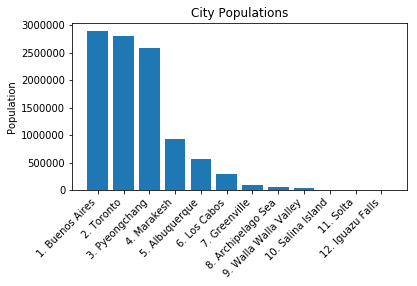

In [77]:
fig, ax = plt.subplots()

plt.bar(names_and_ranks, city_populations)
plt.ylabel('Population')
plt.title('City Populations')
fig.autofmt_xdate(bottom=0.3, rotation=45, ha='right')
plt.show()


Now we want declare a variable called `city_areas` that points to a list of all of the areas of the cities.  Let's use a `for` loop to iterate through our `cities` and have `city_areas` equal to each area of the city.  

In [ ]:
city_areas = []

Now that we have the city areas and populations, let's plot them to see how the size of each city compares to its population. 

In [ ]:
plt.bar(names_and_ranks, city_populations)

plt.ylabel('Population')
plt.xlabel('Cities')
plt.title('City Populations')
plt.xticks(rotation='vertical')
 
plt.show()

In [ ]:
plt.bar(names_and_ranks, city_areas)
plt.ylabel('Area')
plt.xlabel('Cities')
plt.title('City Areas')
plt.xticks(rotation='vertical')
 
plt.show()

### Summary

In this section we saw how we can use `for` loops to go through elements of a list and perform the same operation on each.  By using `for` loops we were able to reduce the amount of code that we wrote and while also writing more expressive code.